In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
from random import randint

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## THEORETICAL DEFINITION OF THE MAIN FUNCTIONS

### (1) Random Numbers Generator Functions

In [3]:
def X_Data_Generator(first_number, last_number, quantity_of_numbers):
    Data_X=np.sort(random.sample(range(first_number, last_number), quantity_of_numbers))   
    return(Data_X)

def Y_Data_Generator(Data_X, Real_Slope, Real_Bias, Variance):
    Data_Y=np.arange(np.size(Data_X))
    for i in np.arange(np.size(Data_X)):
        Data_Y[i]=random.gauss((Real_Slope)*Data_X[i] + Real_Bias, Variance)
    return(Data_Y)

### (2) Training Linear Regression Function

In [4]:
def Training_Linear_Regression(Training_Data):
    M_x=Training_Data[:,0].mean()
    M_y=Training_Data[:,1].mean()
    M_xy=(Training_Data[:,0]*Training_Data[:,1]).mean()
    S_x=Training_Data[:,0].var()
    
    w= (M_xy - M_x*M_y)/S_x
    b=M_y - w*(M_x)
    return(w,b)

### (3) True Parameters and Function

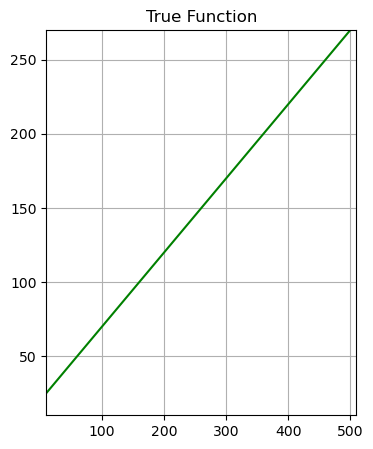

In [15]:
Real_Slope=0.5
Real_Bias=20

plt.figure(figsize=(4, 5))
plt.title('True Function')


plt.plot(list(range(0, 500)), [(Real_Slope)*x + Real_Bias for x in range(0,500)], c='green')
plt.xlim(10, 510)
plt.ylim(10,270)
plt.grid()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## EXPERIMENT: COMPARISON OF REGRESSION PARAMETERS OBTAINED BY 2 SAMPLES

### Sample 1

In [4]:
Data1_X = X_Data_Generator(20,500,10)
Data1_Y = Y_Data_Generator(Data1_X, 0.5, 20, 20)       # varianza 50
Training_Data_1=(np.array([Data1_X,Data1_Y])).T
Slope_1=Training_Linear_Regression(Training_Data_1)[0]
Bias_1=Training_Linear_Regression(Training_Data_1)[1]
#print(Data1_X)
#print(Training_Data_1)
#print(np.array([Data1_X,Data1_Y]).T)

### Sample 2 (Sample 1 is a subset of Sample 2)

In [5]:
Data2_X = X_Data_Generator(20,500,100)
Data2_Y = Y_Data_Generator(Data2_X, 0.5, 20, 20)       # varianza 50
Training_Data_2=(np.array([Data2_X,Data2_Y])).T
Training_Data_2=np.concatenate((Training_Data_1,Training_Data_2), axis=0)   # I make sure Training_Data_1 is a 
                                                                            # subset of Training_Data_2
Slope_2=Training_Linear_Regression(Training_Data_2)[0]
Bias_2=Training_Linear_Regression(Training_Data_2)[1]

### Comparison of regression parameters obtained from the 2  samples

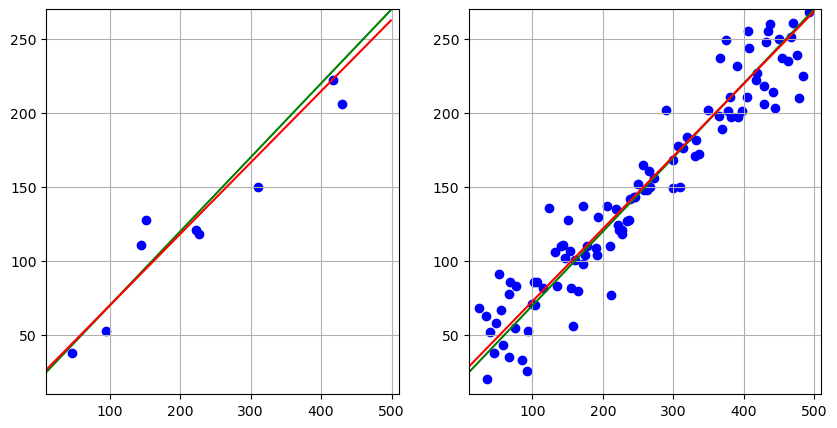

In [6]:
plt.figure(figsize=(10, 5))
plt.title('Comparison')

plt.subplot(1, 2, 1)  # rows, columns, panel selected
plt.scatter(Training_Data_1[:,0], Training_Data_1[:,1], c='blue')
plt.plot(list(range(0, 500)), [(Real_Slope)*x + Real_Bias for x in range(0,500)], c='green')     # True Function
plt.plot(list(range(0, 500)), [Slope_1*x + Bias_1 for x in range(0,500)], c='red')               # Regression Model
plt.xlim(10, 510)
plt.ylim(10,270)
plt.grid()


plt.subplot(1, 2, 2)  # rows, columns, panel selected
plt.scatter(Training_Data_2[:,0], Training_Data_2[:,1], c='blue')
plt.plot(list(range(0, 500)), [(Real_Slope)*x + Real_Bias for x in range(0,500)], c='green')     # True Function
plt.plot(list(range(0, 500)), [Slope_2*x + Bias_2 for x in range(0,500)], c='red')               # Regression Model
plt.xlim(10, 510)
plt.ylim(10,270)
plt.grid()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## RUNNING THE EXPERIMENT MULTIPLE TIMES

In [21]:
i=0
regression_1=0
regression_2=0


while i<1000:
    Data1_X = X_Data_Generator(20,500,20)
    Data1_Y = Y_Data_Generator(Data1_X, 0.5, 20, 20)       
    Training_Data_1=(np.array([Data1_X,Data1_Y])).T
    Slope_1=Training_Linear_Regression(Training_Data_1)[0]
    Bias_1=Training_Linear_Regression(Training_Data_1)[1]
    
    Data2_X = X_Data_Generator(20,500,120)
    Data2_Y = Y_Data_Generator(Data2_X, 0.5, 20, 20)      
    Training_Data_2=(np.array([Data2_X,Data2_Y])).T
    Training_Data_2=np.concatenate((Training_Data_1,Training_Data_2), axis=0)                                                                       
    Slope_2=Training_Linear_Regression(Training_Data_2)[0]
    Bias_2=Training_Linear_Regression(Training_Data_2)[1]
    
    if abs(Slope_1-Real_Slope)>abs(Slope_2-Real_Slope) and abs(Bias_1-Real_Bias)>abs(Bias_2-Real_Bias):
        regression_2+= 1
    
    elif abs(Slope_1-Real_Slope)<=abs(Slope_2-Real_Slope) or abs(Bias_1-Real_Bias)<=abs(Bias_2-Real_Bias):
        regression_1+= 1

    '''
    plt.figure(figsize=(10, 5))
    plt.title('My Nice Plot')

    plt.subplot(1, 2, 1)  # rows, columns, panel selected
    plt.scatter(Training_Data_1[:,0], Training_Data_1[:,1], c='blue')
    plt.plot(list(range(0, 500)), [(Real_Slope)*x + Real_Bias for x in range(0,500)], c='green')
    plt.plot(list(range(0, 500)), [Slope_1*x + Bias_1 for x in range(0,500)], c='red')
    plt.xlim(10, 510)
    plt.ylim(10,270)
    plt.grid()

    plt.subplot(1, 2, 2)  # rows, columns, panel selected
    plt.scatter(Training_Data_2[:,0], Training_Data_2[:,1], c='blue')
    plt.plot(list(range(0, 500)), [(Real_Slope)*x + Real_Bias for x in range(0,500)], c='green')
    plt.plot(list(range(0, 500)), [Slope_2*x + Bias_2 for x in range(0,500)], c='red')
    plt.xlim(10, 510)
    plt.ylim(10,270)
    plt.grid()
    ''' 
    i+=1

    
print(f"The number of time the regression with more data is better than the one with less data is: {regression_2}")
print(f"The number of time the regression with more data is worse than the one with less data is: {regression_1}")
print(f"The total number of experiment is: {i}")

The number of time the regression with more data is better than the one with less data is: 670
The number of time the regression with more data is worse than the one with less data is: 330
The total number of experiment is: 1000
